In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
utah_drought =  pd.read_csv(r"C:\Users\Dhruv\Downloads\dm_export_20000101_20250131.csv")

In [3]:
utah_drought

,Name,MapDate,DSCI
0,Utah,20000104,0
1,Utah,20000111,37
2,Utah,20000118,56
3,Utah,20000125,56
4,Utah,20000201,56
...,...,...,...
1304,Utah,20241231,111
1305,Utah,20250107,108
1306,Utah,20250114,111
1307,Utah,20250121,115


In [4]:
utah_drought["MapDate"] = pd.to_datetime(utah_drought["MapDate"] , format="%Y%m%d")


In [5]:
utah_drought

,Name,MapDate,DSCI
0,Utah,2000-01-04,0
1,Utah,2000-01-11,37
2,Utah,2000-01-18,56
3,Utah,2000-01-25,56
4,Utah,2000-02-01,56
...,...,...,...
1304,Utah,2024-12-31,111
1305,Utah,2025-01-07,108
1306,Utah,2025-01-14,111
1307,Utah,2025-01-21,115


In [6]:
full_date_range = pd.date_range(start=utah_drought["MapDate"].min(), end=utah_drought["MapDate"].max(), freq="D")

In [7]:
full_date_range

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-08', '2000-01-09', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2025-01-19', '2025-01-20', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24', '2025-01-25', '2025-01-26',
               '2025-01-27', '2025-01-28'],
              dtype='datetime64[ns]', length=9157, freq='D')

In [8]:
df_full = pd.DataFrame({"MapDate": full_date_range}).merge(utah_drought, on="MapDate", how="left")

In [9]:
df_full["DSCI"] = df_full["DSCI"].fillna(method="ffill")

In [10]:
df_full["Name"] = df_full["Name"].fillna(method="ffill")

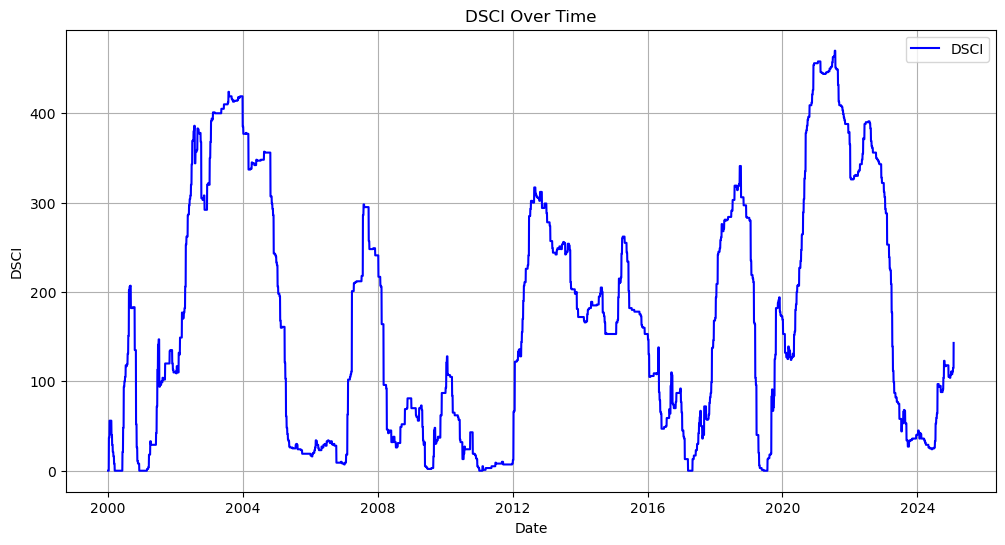

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_full["MapDate"], df_full["DSCI"], label="DSCI", color="blue")
plt.xlabel("Date")
plt.ylabel("DSCI")
plt.title("DSCI Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
utah_drought = df_full.copy()

In [13]:
beaver_soil = pd.read_csv(r"C:\Users\Dhruv\Downloads\Beaver Divide.csv")

In [14]:
df_melted = beaver_soil.melt(id_vars=["date"], var_name="year", value_name="soil_moisture")

# Convert 'date' to a proper datetime format
df_melted["date"] = df_melted["year"].astype(str) + "-" + df_melted["date"]
df_melted["date"] = pd.to_datetime(df_melted["date"], format="%Y-%m-%d", errors="coerce")

# Extract Year-Month for grouping
df_melted["Date"] = df_melted["date"].dt.to_period("M")

# Compute the average soil moisture per month
monthly_avg = df_melted.groupby("Date")["soil_moisture"].mean().reset_index()

beaver_soil = monthly_avg.copy()
beaver_soil = beaver_soil.rename(columns={"soil_moisture": "beaver_soil"})
beaver_soil["Date"] = beaver_soil["Date"].dt.to_timestamp()

beaver_soil

,Date,beaver_soil
0,2005-01-01,50.013202
1,2005-02-01,66.024246
2,2005-03-01,86.225069
3,2005-04-01,91.962830
4,2005-05-01,92.744379
...,...,...
247,2025-08-01,NaN
248,2025-09-01,NaN
249,2025-10-01,21.095462
250,2025-11-01,25.744772


In [15]:
beaver_soil.set_index("Date", inplace=True)

# Create a complete date range from 2000-01-01 to the last available date
full_date_range = pd.date_range(start="2000-01-01", end=beaver_soil.index.max(), freq='MS')

# Reindex the DataFrame with this new range
beaver_soil = beaver_soil.reindex(full_date_range)

# Interpolate missing values
beaver_soil.interpolate(method='linear', inplace=True)

# Reset index and rename columns
beaver_soil.reset_index(inplace=True)
beaver_soil.rename(columns={"index": "Date"}, inplace=True)

mean_value = beaver_soil["beaver_soil"].mean()

# Fill missing values with the mean
beaver_soil["beaver_soil"].fillna(mean_value, inplace=True)

# Reset index to keep the Date column
beaver_soil.reset_index(inplace=True)

beaver_soil

,index,Date,beaver_soil
0,0,2000-01-01,53.260413
1,1,2000-02-01,53.260413
2,2,2000-03-01,53.260413
3,3,2000-04-01,53.260413
4,4,2000-05-01,53.260413
...,...,...,...
307,307,2025-08-01,23.815084
308,308,2025-09-01,22.455273
309,309,2025-10-01,21.095462
310,310,2025-11-01,25.744772


In [16]:
hayden_soil = pd.read_csv(r"C:\Users\Dhruv\Downloads\Hayden Fork.csv")
df_melted = hayden_soil.melt(id_vars=["date"], var_name="year", value_name="soil_moisture")

# Convert 'date' to a proper datetime format
df_melted["date"] = df_melted["year"].astype(str) + "-" + df_melted["date"]
df_melted["date"] = pd.to_datetime(df_melted["date"], format="%Y-%m-%d", errors="coerce")

# Extract Year-Month for grouping
df_melted["Date"] = df_melted["date"].dt.to_period("M")

# Compute the average soil moisture per month
monthly_avg = df_melted.groupby("Date")["soil_moisture"].mean().reset_index()

hayden_soil = monthly_avg.copy()
hayden_soil = hayden_soil.rename(columns={"soil_moisture": "hayden_soil"})
hayden_soil["Date"] = hayden_soil["Date"].dt.to_timestamp()
hayden_soil


,Date,hayden_soil
0,2006-01-01,86.998717
1,2006-02-01,87.606453
2,2006-03-01,88.143453
3,2006-04-01,97.044863
4,2006-05-01,98.849074
...,...,...
235,2025-08-01,NaN
236,2025-09-01,NaN
237,2025-10-01,62.284267
238,2025-11-01,87.379917


In [17]:
hayden_soil.set_index("Date", inplace=True)

# Create a complete date range from 2000-01-01 to the last available date
full_date_range = pd.date_range(start="2000-01-01", end=hayden_soil.index.max(), freq='MS')

# Reindex the DataFrame with this new range
hayden_soil = hayden_soil.reindex(full_date_range)

# Interpolate missing values
hayden_soil.interpolate(method='linear', inplace=True)

# Reset index and rename columns
hayden_soil.reset_index(inplace=True)
hayden_soil.rename(columns={"index": "Date"}, inplace=True)

mean_value = hayden_soil["hayden_soil"].mean()

# Fill missing values with the mean
hayden_soil["hayden_soil"].fillna(mean_value, inplace=True)

# Reset index to keep the Date column
hayden_soil.reset_index(inplace=True)

hayden_soil

,index,Date,hayden_soil
0,0,2000-01-01,79.973820
1,1,2000-02-01,79.973820
2,2,2000-03-01,79.973820
3,3,2000-04-01,79.973820
4,4,2000-05-01,79.973820
...,...,...,...
307,307,2025-08-01,68.213884
308,308,2025-09-01,65.249075
309,309,2025-10-01,62.284267
310,310,2025-11-01,87.379917


In [18]:
trial_soil = pd.read_csv(r"C:\Users\Dhruv\Downloads\Trial Lake.csv")
df_melted = trial_soil.melt(id_vars=["date"], var_name="year", value_name="soil_moisture")

# Convert 'date' to a proper datetime format
df_melted["date"] = df_melted["year"].astype(str) + "-" + df_melted["date"]
df_melted["date"] = pd.to_datetime(df_melted["date"], format="%Y-%m-%d", errors="coerce")

# Extract Year-Month for grouping
df_melted["Date"] = df_melted["date"].dt.to_period("M")

# Compute the average soil moisture per month
monthly_avg = df_melted.groupby("Date")["soil_moisture"].mean().reset_index()

trial_soil = monthly_avg.copy()
trial_soil = trial_soil.rename(columns={"soil_moisture": "trial_soil"})
trial_soil["Date"] = trial_soil["Date"].dt.to_timestamp()
trial_soil  

,Date,trial_soil
0,2003-01-01,62.831184
1,2003-02-01,63.069201
2,2003-03-01,72.680694
3,2003-04-01,90.460290
4,2003-05-01,92.962963
...,...,...
271,2025-08-01,NaN
272,2025-09-01,NaN
273,2025-10-01,54.790225
274,2025-11-01,70.728713


In [19]:
trial_soil.set_index("Date", inplace=True)

# Create a complete date range from 2000-01-01 to the last available date
full_date_range = pd.date_range(start="2000-01-01", end=trial_soil.index.max(), freq='MS')

# Reindex the DataFrame with this new range
trial_soil = trial_soil.reindex(full_date_range)

# Interpolate missing values
trial_soil.interpolate(method='linear', inplace=True)

# Reset index and rename columns
trial_soil.reset_index(inplace=True)
trial_soil.rename(columns={"index": "Date"}, inplace=True)

mean_value = trial_soil["trial_soil"].mean()

# Fill missing values with the mean
trial_soil["trial_soil"].fillna(mean_value, inplace=True)

# Reset index to keep the Date column
trial_soil.reset_index(inplace=True)

trial_soil

,index,Date,trial_soil
0,0,2000-01-01,75.729404
1,1,2000-02-01,75.729404
2,2,2000-03-01,75.729404
3,3,2000-04-01,75.729404
4,4,2000-05-01,75.729404
...,...,...,...
307,307,2025-08-01,58.650072
308,308,2025-09-01,56.720148
309,309,2025-10-01,54.790225
310,310,2025-11-01,70.728713


In [23]:
parley_soil = pd.read_csv(r"C:\Users\Dhruv\Downloads\Parleys Summit.csv")
df_melted = parley_soil.melt(id_vars=["date"], var_name="year", value_name="soil_moisture")

# Convert 'date' to a proper datetime format
df_melted["date"] = df_melted["year"].astype(str) + "-" + df_melted["date"]
df_melted["date"] = pd.to_datetime(df_melted["date"], format="%Y-%m-%d", errors="coerce")

# Extract Year-Month for grouping
df_melted["Date"] = df_melted["date"].dt.to_period("M")

# Compute the average soil moisture per month
monthly_avg = df_melted.groupby("Date")["soil_moisture"].mean().reset_index()

parley_soil = monthly_avg.copy()
parley_soil = parley_soil.rename(columns={"soil_moisture": "parely_soil"})
parley_soil["Date"] = parley_soil["Date"].dt.to_timestamp()
parley_soil  

,Date,parely_soil
0,2004-01-01,92.209457
1,2004-02-01,92.212238
2,2004-03-01,92.445391
3,2004-04-01,95.237543
4,2004-05-01,94.870374
...,...,...
259,2025-08-01,NaN
260,2025-09-01,NaN
261,2025-10-01,54.618604
262,2025-11-01,72.256031


In [24]:
parley_soil.set_index("Date", inplace=True)

# Create a complete date range from 2000-01-01 to the last available date
full_date_range = pd.date_range(start="2000-01-01", end=parley_soil.index.max(), freq='MS')

# Reindex the DataFrame with this new range
parley_soil = parley_soil.reindex(full_date_range)

# Interpolate missing values
parley_soil.interpolate(method='linear', inplace=True)

# Reset index and rename columns
parley_soil.reset_index(inplace=True)
parley_soil.rename(columns={"index": "Date"}, inplace=True)

mean_value = parley_soil["parely_soil"].mean()

# Fill missing values with the mean
parley_soil["parely_soil"].fillna(mean_value, inplace=True)

# Reset index to keep the Date column
parley_soil.reset_index(inplace=True)

parley_soil

,index,Date,parely_soil
0,0,2000-01-01,77.275354
1,1,2000-02-01,77.275354
2,2,2000-03-01,77.275354
3,3,2000-04-01,77.275354
4,4,2000-05-01,77.275354
...,...,...,...
307,307,2025-08-01,60.751424
308,308,2025-09-01,57.685014
309,309,2025-10-01,54.618604
310,310,2025-11-01,72.256031


In [25]:
utah_rain_data = pd.read_csv(r"C:\Users\Dhruv\Downloads\rain_data_utah - Sheet1.csv")

In [26]:
utah_rain_data

,YEAR,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,2000,2.17,1.8,0.8,0.76,1.62,0.36,0.42,2,1.86,2,1.31,1.24,16.34
1,2001,0.78,1.5,1.55,2.46,0.22,1.12,1.13,0.53,0.05,0.92,3.34,1.44,15.04
2,2002,1.19,0.3,2.47,2.49,0.48,0.18,0.14,0.03,1.12,0.71,0.64,0.54,10.29
3,2003,0.64,1.06,1.39,1.65,1.67,0.88,0.33,0.67,1.59,0.16,1.94,3.97,15.95
4,2004,0.46,2.25,0.88,2.38,0.95,1.7,0.34,0.19,0.5,3.48,1.24,0.52,14.89
5,2005,1.44,1.23,2.44,3.15,2.88,1.64,0.01,0.72,0.4,0.91,0.8,1.26,16.88
6,2006,1.36,1.26,2.76,3.14,0.79,0.72,0.26,0.92,1.87,1.02,1.13,0.91,16.14
7,2007,0.73,1.53,1.11,0.53,0.57,0.8,0.53,0.1,1.74,1.88,0.49,3.35,13.36
8,2008,1.3,1.24,1.34,0.75,1.01,0.75,0.14,0.83,0.31,1.29,1.5,1.28,11.74
9,2009,2.15,0.83,1.72,2.55,1.36,2.64,0.28,0.4,1.19,1.18,0.2,1.35,15.85


In [27]:
# Group by year and month, then compute the mean DSCI
utah_drought["YearMonth"] = utah_drought["MapDate"].dt.to_period("M")  # Extract year-month
monthly_avg_dsci = utah_drought.groupby("YearMonth")["DSCI"].mean().reset_index()

# Convert 'YearMonth' back to datetime for plotting (optional)
monthly_avg_dsci["YearMonth"] = monthly_avg_dsci["YearMonth"].astype(str)

monthly_avg_dsci

,YearMonth,DSCI
0,2000-01,37.250000
1,2000-02,35.793103
2,2000-03,4.903226
3,2000-04,0.000000
4,2000-05,0.000000
...,...,...
296,2024-09,90.033333
297,2024-10,109.548387
298,2024-11,117.866667
299,2024-12,106.258065


In [28]:
utah_drought_avg = monthly_avg_dsci.copy()

In [29]:
# Column names
columns = ["YEAR", "January", "February", "March", "April", "May", "June", "July", 
           "August", "September", "October", "November", "December"]


# Reshape the DataFrame
melted_df = utah_rain_data.melt(id_vars=["YEAR"], var_name="Month", value_name="Value")

# Convert month names to numbers
month_map = {
    "January": "01", "February": "02", "March": "03", "April": "04", "May": "05", "June": "06",
    "July": "07", "August": "08", "September": "09", "October": "10", "November": "11", "December": "12"
}
melted_df["Month"] = melted_df["Month"].map(month_map)

# Create MM-YYYY format
melted_df["Date"] = melted_df["Month"] + "-" + melted_df["YEAR"].astype(str)

# Create dictionary
result_dict = dict(zip(melted_df["Date"], melted_df["Value"]))

final_df = pd.DataFrame(list(result_dict.items()), columns=["Date", "Value"])


In [30]:
# Convert 'Date' column to datetime format
final_df["Date"] = pd.to_datetime(final_df["Date"], format="%m-%Y", errors='coerce')

# Sort the DataFrame by Date
final_df = final_df.sort_values(by="Date").reset_index(drop=True)

# Convert back to "MM-YYYY" format if needed
final_df["Date"] = final_df["Date"].dt.strftime("%m-%Y")

In [31]:
gsl_levels = pd.read_csv(r"C:\Users\Dhruv\Downloads\gsl - Sheet1.csv")

In [32]:
gsl_levels

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,"4,202.58","4,202.92","4,203.29","4,203.33","4,203.18","4,202.75","4,202.14","4,201.56","4,201.26","4,201.04","4,201.08","4,201.14"
1,2001,"4,201.22","4,201.31","4,201.47","4,201.50","4,201.31","4,200.92","4,200.39","4,199.81","4,199.34","4,198.95","4,198.85","4,199.09"
2,2002,"4,199.22","4,199.33","4,199.48","4,199.61","4,199.61","4,199.29","4,198.68","4,197.97","4,197.58","4,197.40","4,197.31","4,197.28"
3,2003,"4,197.51","4,197.64","4,197.74","4,197.68","4,197.63","4,197.22","4,196.70","4,196.05","4,195.61","4,195.32","4,195.09","4,195.16"
4,2004,"4,195.39","4,195.58","4,196.13","4,196.25","4,196.03","4,195.71","4,195.22","4,194.64","4,194.30","4,194.06","4,194.30","4,194.41"
5,2005,"4,194.83","4,195.36","4,195.59","4,195.96","4,196.82","4,197.34","4,197.01","4,196.34","4,195.77","4,195.50","4,195.50","4,195.56"
6,2006,"4,196.07","4,196.45","4,196.78","4,197.51","4,198.07","4,197.95","4,197.42","4,196.80","4,196.41","4,196.44","4,196.50","4,196.68"
7,2007,"4,196.84","4,196.99","4,197.42","4,197.59","4,197.39","4,197.02","4,196.45","4,195.84","4,195.33","4,195.16","4,195.11","4,195.19"
8,2008,"4,195.33","4,195.49","4,195.95","4,196.01","4,195.93","4,195.90","4,195.38","4,194.71","4,194.23","4,194.01","4,194.03","4,194.07"
9,2009,"4,194.23","4,194.64","4,195.08","4,195.35","4,195.73","4,195.88","4,195.84","4,195.12","4,194.69","4,194.40","4,194.38","4,194.39"


In [33]:
# Column names
columns = ["YEAR", "January", "February", "March", "April", "May", "June", "July", 
           "August", "September", "October", "November", "December"]


# Reshape the DataFrame
melted_df = gsl_levels.melt(id_vars=["Year"], var_name="Month", value_name="Value")

# Convert month names to numbers
month_map = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06",
    "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}
melted_df["Month"] = melted_df["Month"].map(month_map)

# Create MM-YYYY format
melted_df["Date"] = melted_df["Month"] + "-" + melted_df["Year"].astype(str)

# Create dictionary
result_dict = dict(zip(melted_df["Date"], melted_df["Value"]))

gsl_final_df = pd.DataFrame(list(result_dict.items()), columns=["Date", "Value"])


In [34]:
rain_df = final_df.copy()

In [35]:
gsl_df = gsl_final_df.copy()

In [36]:
utah_drought_avg = utah_drought_avg.rename(columns={"YearMonth": "Date"})


In [37]:
utah_drought_avg["Date"] = pd.to_datetime(utah_drought_avg["Date"])

In [38]:
rain_df["Date"] = pd.to_datetime(rain_df["Date"] )

In [39]:
gsl_df["Date"] = pd.to_datetime(gsl_df["Date"] )

In [40]:
utah_drought_avg

,Date,DSCI
0,2000-01-01,37.250000
1,2000-02-01,35.793103
2,2000-03-01,4.903226
3,2000-04-01,0.000000
4,2000-05-01,0.000000
...,...,...
296,2024-09-01,90.033333
297,2024-10-01,109.548387
298,2024-11-01,117.866667
299,2024-12-01,106.258065


In [41]:
utah_drought_avg = pd.merge(utah_drought_avg, rain_df, on = "Date", how = "inner")

In [42]:
utah_drought_avg = pd.merge(utah_drought_avg, gsl_df, on = "Date", how = "inner")

In [43]:
utah_drought_avg

,Date,DSCI,Value_x,Value_y
0,2000-01-01,37.250000,2.17,"4,202.58"
1,2000-02-01,35.793103,1.8,"4,202.92"
2,2000-03-01,4.903226,0.8,"4,203.29"
3,2000-04-01,0.000000,0.76,"4,203.33"
4,2000-05-01,0.000000,1.62,"4,203.18"
...,...,...,...,...
295,2024-08-01,90.516129,1.15,"4,193.23"
296,2024-09-01,90.033333,0.42,"4,192.66"
297,2024-10-01,109.548387,0.79,"4,192.32"
298,2024-11-01,117.866667,1.22,"4,192.18"


In [44]:
utah_drought_avg = pd.merge(utah_drought_avg, beaver_soil, on = "Date", how = "left")

In [45]:
utah_drought_avg

,Date,DSCI,Value_x,Value_y,index,beaver_soil
0,2000-01-01,37.250000,2.17,"4,202.58",0,53.260413
1,2000-02-01,35.793103,1.8,"4,202.92",1,53.260413
2,2000-03-01,4.903226,0.8,"4,203.29",2,53.260413
3,2000-04-01,0.000000,0.76,"4,203.33",3,53.260413
4,2000-05-01,0.000000,1.62,"4,203.18",4,53.260413
...,...,...,...,...,...,...
295,2024-08-01,90.516129,1.15,"4,193.23",295,26.384173
296,2024-09-01,90.033333,0.42,"4,192.66",296,23.712919
297,2024-10-01,109.548387,0.79,"4,192.32",297,63.589031
298,2024-11-01,117.866667,1.22,"4,192.18",298,63.219032


In [46]:
utah_drought_avg = pd.merge(utah_drought_avg, trial_soil, on = "Date", how = "left")

In [47]:
utah_drought_avg = pd.merge(utah_drought_avg, parley_soil, on = "Date", how = "left")

In [48]:
utah_drought_avg = pd.merge(utah_drought_avg, hayden_soil, on = "Date", how = "left")

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_34832\2670751474.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  utah_drought_avg = pd.merge(utah_drought_avg, hayden_soil, on = "Date", how = "left")


In [49]:
utah_drought_avg

,Date,DSCI,Value_x,Value_y,index_x,beaver_soil,index_y,trial_soil,index_x,parely_soil,index_y,hayden_soil
0,2000-01-01,37.250000,2.17,"4,202.58",0,53.260413,0,75.729404,0,77.275354,0,79.973820
1,2000-02-01,35.793103,1.8,"4,202.92",1,53.260413,1,75.729404,1,77.275354,1,79.973820
2,2000-03-01,4.903226,0.8,"4,203.29",2,53.260413,2,75.729404,2,77.275354,2,79.973820
3,2000-04-01,0.000000,0.76,"4,203.33",3,53.260413,3,75.729404,3,77.275354,3,79.973820
4,2000-05-01,0.000000,1.62,"4,203.18",4,53.260413,4,75.729404,4,77.275354,4,79.973820
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,90.516129,1.15,"4,193.23",295,26.384173,295,68.535362,295,61.969000,295,72.877144
296,2024-09-01,90.033333,0.42,"4,192.66",296,23.712919,296,61.698921,296,52.953114,296,60.601569
297,2024-10-01,109.548387,0.79,"4,192.32",297,63.589031,297,84.095834,297,85.240733,297,89.946833
298,2024-11-01,117.866667,1.22,"4,192.18",298,63.219032,298,77.190747,298,86.973344,298,93.519835


In [50]:
utah_drought_avg = utah_drought_avg.rename(columns={"Value_x": "Rainfall"})
utah_drought_avg = utah_drought_avg.rename(columns={"Value_y": "GSL Levels"})
utah_drought_avg = utah_drought_avg.drop(["index_x", "index_y"], axis=1)

In [51]:
utah_drought_avg

,Date,DSCI,Rainfall,GSL Levels,beaver_soil,trial_soil,parely_soil,hayden_soil
0,2000-01-01,37.250000,2.17,"4,202.58",53.260413,75.729404,77.275354,79.973820
1,2000-02-01,35.793103,1.8,"4,202.92",53.260413,75.729404,77.275354,79.973820
2,2000-03-01,4.903226,0.8,"4,203.29",53.260413,75.729404,77.275354,79.973820
3,2000-04-01,0.000000,0.76,"4,203.33",53.260413,75.729404,77.275354,79.973820
4,2000-05-01,0.000000,1.62,"4,203.18",53.260413,75.729404,77.275354,79.973820
...,...,...,...,...,...,...,...,...
295,2024-08-01,90.516129,1.15,"4,193.23",26.384173,68.535362,61.969000,72.877144
296,2024-09-01,90.033333,0.42,"4,192.66",23.712919,61.698921,52.953114,60.601569
297,2024-10-01,109.548387,0.79,"4,192.32",63.589031,84.095834,85.240733,89.946833
298,2024-11-01,117.866667,1.22,"4,192.18",63.219032,77.190747,86.973344,93.519835


In [52]:
utah_drought_avg = utah_drought_avg[["Date", "Rainfall","GSL Levels", "beaver_soil", "trial_soil" , "parely_soil", "hayden_soil" ,"DSCI"]]

In [53]:
utah_drought_avg

,Date,Rainfall,GSL Levels,beaver_soil,trial_soil,parely_soil,hayden_soil,DSCI
0,2000-01-01,2.17,"4,202.58",53.260413,75.729404,77.275354,79.973820,37.250000
1,2000-02-01,1.8,"4,202.92",53.260413,75.729404,77.275354,79.973820,35.793103
2,2000-03-01,0.8,"4,203.29",53.260413,75.729404,77.275354,79.973820,4.903226
3,2000-04-01,0.76,"4,203.33",53.260413,75.729404,77.275354,79.973820,0.000000
4,2000-05-01,1.62,"4,203.18",53.260413,75.729404,77.275354,79.973820,0.000000
...,...,...,...,...,...,...,...,...
295,2024-08-01,1.15,"4,193.23",26.384173,68.535362,61.969000,72.877144,90.516129
296,2024-09-01,0.42,"4,192.66",23.712919,61.698921,52.953114,60.601569,90.033333
297,2024-10-01,0.79,"4,192.32",63.589031,84.095834,85.240733,89.946833,109.548387
298,2024-11-01,1.22,"4,192.18",63.219032,77.190747,86.973344,93.519835,117.866667


In [54]:
utah_temp_data = pd.read_csv(r"C:\Users\Dhruv\Downloads\temp_data_utah - Sheet1.csv")

In [55]:
# Column names
columns = ["YEAR", "January", "February", "March", "April", "May", "June", "July", 
           "August", "September", "October", "November", "December"]


# Reshape the DataFrame
melted_df = utah_temp_data.melt(id_vars=["YEAR"], var_name="Month", value_name="Value")

# Convert month names to numbers
month_map = {
    "January": "01", "February": "02", "March": "03", "April": "04", "May": "05", "June": "06",
    "July": "07", "August": "08", "September": "09", "October": "10", "November": "11", "December": "12"
}
melted_df["Month"] = melted_df["Month"].map(month_map)

# Create MM-YYYY format
melted_df["Date"] = melted_df["Month"] + "-" + melted_df["YEAR"].astype(str)

# Create dictionary
result_dict = dict(zip(melted_df["Date"], melted_df["Value"]))

final_df = pd.DataFrame(list(result_dict.items()), columns=["Date", "Value"])


In [56]:
final_df["Date"] = pd.to_datetime(final_df["Date"] )

In [57]:
utah_temp_avg = final_df.copy()

In [58]:
utah_temp_avg = utah_temp_avg.rename(columns={"Value": "Temperature"})

In [59]:
utah_drought_avg = pd.merge(utah_drought_avg, utah_temp_avg, on = "Date", how = "inner")

In [60]:
utah_drought_avg = utah_drought_avg[utah_drought_avg["Date"] != "2025-01-01"]

In [61]:
utah_drought_avg = utah_drought_avg[["Date"	,"Rainfall", "Temperature", "GSL Levels", "beaver_soil", "trial_soil", "parely_soil", "hayden_soil" ,"DSCI"]]

In [62]:
utah_drought_avg

,Date,Rainfall,Temperature,GSL Levels,beaver_soil,trial_soil,parely_soil,hayden_soil,DSCI
0,2000-01-01,2.17,35.1,"4,202.58",53.260413,75.729404,77.275354,79.973820,37.250000
1,2000-02-01,1.8,39.8,"4,202.92",53.260413,75.729404,77.275354,79.973820,35.793103
2,2000-03-01,0.8,42,"4,203.29",53.260413,75.729404,77.275354,79.973820,4.903226
3,2000-04-01,0.76,54.5,"4,203.33",53.260413,75.729404,77.275354,79.973820,0.000000
4,2000-05-01,1.62,61.7,"4,203.18",53.260413,75.729404,77.275354,79.973820,0.000000
...,...,...,...,...,...,...,...,...,...
295,2024-08-01,1.15,80,"4,193.23",26.384173,68.535362,61.969000,72.877144,90.516129
296,2024-09-01,0.42,73,"4,192.66",23.712919,61.698921,52.953114,60.601569,90.033333
297,2024-10-01,0.79,62.4,"4,192.32",63.589031,84.095834,85.240733,89.946833,109.548387
298,2024-11-01,1.22,40.9,"4,192.18",63.219032,77.190747,86.973344,93.519835,117.866667


In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [64]:
utah_drought_avg

,Date,Rainfall,Temperature,GSL Levels,beaver_soil,trial_soil,parely_soil,hayden_soil,DSCI
0,2000-01-01,2.17,35.1,"4,202.58",53.260413,75.729404,77.275354,79.973820,37.250000
1,2000-02-01,1.8,39.8,"4,202.92",53.260413,75.729404,77.275354,79.973820,35.793103
2,2000-03-01,0.8,42,"4,203.29",53.260413,75.729404,77.275354,79.973820,4.903226
3,2000-04-01,0.76,54.5,"4,203.33",53.260413,75.729404,77.275354,79.973820,0.000000
4,2000-05-01,1.62,61.7,"4,203.18",53.260413,75.729404,77.275354,79.973820,0.000000
...,...,...,...,...,...,...,...,...,...
295,2024-08-01,1.15,80,"4,193.23",26.384173,68.535362,61.969000,72.877144,90.516129
296,2024-09-01,0.42,73,"4,192.66",23.712919,61.698921,52.953114,60.601569,90.033333
297,2024-10-01,0.79,62.4,"4,192.32",63.589031,84.095834,85.240733,89.946833,109.548387
298,2024-11-01,1.22,40.9,"4,192.18",63.219032,77.190747,86.973344,93.519835,117.866667


In [65]:
utah_drought_avg = utah_drought_avg.replace("T", 0)

In [253]:
utah_drought_avg["Drought_Severity"] = utah_drought_avg["DSCI"].apply(lambda x: 1 if (x <= 100 and x > 0) else 0)

In [254]:
utah_drought_avg["Drought_Severity"].value_counts()

0    181
1    119
Name: Drought_Severity, dtype: int64

In [255]:
utah_drought_avg

,Date,Year,Month,Rainfall,Rainfall_3mo_avg,Rainfall_6mo_avg,Temperature,Temperature_3mo_avg,Temperature_6mo_avg,GSL Levels,GSL_3mo_avg,GSL_6mo_avg,beaver_soil,trial_soil,parely_soil,hayden_soil,DSCI,Drought_Severity
0,2000-01-01,2000,1,2.17,2.170000,2.170000,35.1,35.100000,35.100000,4202.58,4202.580000,4202.580000,53.260413,75.729404,77.275354,79.973820,37.250000,1
1,2000-02-01,2000,2,1.8,1.985000,1.985000,39.8,37.450000,37.450000,4202.92,4202.750000,4202.750000,53.260413,75.729404,77.275354,79.973820,35.793103,1
2,2000-03-01,2000,3,0.8,1.590000,1.590000,42,38.966667,38.966667,4203.29,4202.930000,4202.930000,53.260413,75.729404,77.275354,79.973820,4.903226,1
3,2000-04-01,2000,4,0.76,1.120000,1.382500,54.5,45.433333,42.850000,4203.33,4203.180000,4203.030000,53.260413,75.729404,77.275354,79.973820,0.000000,0
4,2000-05-01,2000,5,1.62,1.060000,1.430000,61.7,52.733333,46.620000,4203.18,4203.266667,4203.060000,53.260413,75.729404,77.275354,79.973820,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,2024,8,1.15,0.513333,1.096667,80,80.300000,66.450000,4193.23,4194.043333,4194.296667,26.384173,68.535362,61.969000,72.877144,90.516129,1
296,2024-09-01,2024,9,0.42,0.550000,0.820000,73,78.766667,71.133333,4192.66,4193.320000,4194.066667,23.712919,61.698921,52.953114,60.601569,90.033333,1
297,2024-10-01,2024,10,0.79,0.786667,0.700000,62.4,71.800000,72.516667,4192.32,4192.736667,4193.685000,63.589031,84.095834,85.240733,89.946833,109.548387,0
298,2024-11-01,2024,11,1.22,0.810000,0.661667,40.9,58.766667,69.533333,4192.18,4192.386667,4193.215000,63.219032,77.190747,86.973344,93.519835,117.866667,0


In [256]:
# Extract Month and Year
utah_drought_avg["Year"] = utah_drought_avg["Date"].dt.year
utah_drought_avg["Month"] = utah_drought_avg["Date"].dt.month

# Compute rolling averages for Rainfall and Temperature (3-month & 6-month)
utah_drought_avg["Rainfall_3mo_avg"] = utah_drought_avg["Rainfall"].rolling(window=3, min_periods=1).mean()
utah_drought_avg["Rainfall_6mo_avg"] = utah_drought_avg["Rainfall"].rolling(window=6, min_periods=1).mean()

utah_drought_avg["Temperature_3mo_avg"] = utah_drought_avg["Temperature"].rolling(window=3, min_periods=1).mean()
utah_drought_avg["Temperature_6mo_avg"] = utah_drought_avg["Temperature"].rolling(window=6, min_periods=1).mean()


In [257]:
#utah_drought_avg['GSL Levels'] = utah_drought_avg['GSL Levels'].str.replace(',', '').astype(float)

In [258]:
utah_drought_avg["GSL_3mo_avg"] = utah_drought_avg["GSL Levels"].rolling(window=3, min_periods=1).mean()
utah_drought_avg["GSL_6mo_avg"] = utah_drought_avg["GSL Levels"].rolling(window=6, min_periods=1).mean()

In [259]:
utah_drought_avg

,Date,Year,Month,Rainfall,Rainfall_3mo_avg,Rainfall_6mo_avg,Temperature,Temperature_3mo_avg,Temperature_6mo_avg,GSL Levels,GSL_3mo_avg,GSL_6mo_avg,beaver_soil,trial_soil,parely_soil,hayden_soil,DSCI,Drought_Severity
0,2000-01-01,2000,1,2.17,2.170000,2.170000,35.1,35.100000,35.100000,4202.58,4202.580000,4202.580000,53.260413,75.729404,77.275354,79.973820,37.250000,1
1,2000-02-01,2000,2,1.8,1.985000,1.985000,39.8,37.450000,37.450000,4202.92,4202.750000,4202.750000,53.260413,75.729404,77.275354,79.973820,35.793103,1
2,2000-03-01,2000,3,0.8,1.590000,1.590000,42,38.966667,38.966667,4203.29,4202.930000,4202.930000,53.260413,75.729404,77.275354,79.973820,4.903226,1
3,2000-04-01,2000,4,0.76,1.120000,1.382500,54.5,45.433333,42.850000,4203.33,4203.180000,4203.030000,53.260413,75.729404,77.275354,79.973820,0.000000,0
4,2000-05-01,2000,5,1.62,1.060000,1.430000,61.7,52.733333,46.620000,4203.18,4203.266667,4203.060000,53.260413,75.729404,77.275354,79.973820,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,2024,8,1.15,0.513333,1.096667,80,80.300000,66.450000,4193.23,4194.043333,4194.296667,26.384173,68.535362,61.969000,72.877144,90.516129,1
296,2024-09-01,2024,9,0.42,0.550000,0.820000,73,78.766667,71.133333,4192.66,4193.320000,4194.066667,23.712919,61.698921,52.953114,60.601569,90.033333,1
297,2024-10-01,2024,10,0.79,0.786667,0.700000,62.4,71.800000,72.516667,4192.32,4192.736667,4193.685000,63.589031,84.095834,85.240733,89.946833,109.548387,0
298,2024-11-01,2024,11,1.22,0.810000,0.661667,40.9,58.766667,69.533333,4192.18,4192.386667,4193.215000,63.219032,77.190747,86.973344,93.519835,117.866667,0


In [260]:

utah_drought_avg = utah_drought_avg[
    [
        "Date",
        "Year",
        "Month",
        "Rainfall",
        "Rainfall_3mo_avg",
        "Rainfall_6mo_avg",
        "Temperature",
        "Temperature_3mo_avg",
        "Temperature_6mo_avg",
        "GSL Levels",
        "GSL_3mo_avg",
        "GSL_6mo_avg",
        "beaver_soil",
        "trial_soil",
        "parely_soil",
        "hayden_soil",
        "DSCI",
        "Drought_Severity",
    ]
]

In [261]:
utah_drought_avg

,Date,Year,Month,Rainfall,Rainfall_3mo_avg,Rainfall_6mo_avg,Temperature,Temperature_3mo_avg,Temperature_6mo_avg,GSL Levels,GSL_3mo_avg,GSL_6mo_avg,beaver_soil,trial_soil,parely_soil,hayden_soil,DSCI,Drought_Severity
0,2000-01-01,2000,1,2.17,2.170000,2.170000,35.1,35.100000,35.100000,4202.58,4202.580000,4202.580000,53.260413,75.729404,77.275354,79.973820,37.250000,1
1,2000-02-01,2000,2,1.8,1.985000,1.985000,39.8,37.450000,37.450000,4202.92,4202.750000,4202.750000,53.260413,75.729404,77.275354,79.973820,35.793103,1
2,2000-03-01,2000,3,0.8,1.590000,1.590000,42,38.966667,38.966667,4203.29,4202.930000,4202.930000,53.260413,75.729404,77.275354,79.973820,4.903226,1
3,2000-04-01,2000,4,0.76,1.120000,1.382500,54.5,45.433333,42.850000,4203.33,4203.180000,4203.030000,53.260413,75.729404,77.275354,79.973820,0.000000,0
4,2000-05-01,2000,5,1.62,1.060000,1.430000,61.7,52.733333,46.620000,4203.18,4203.266667,4203.060000,53.260413,75.729404,77.275354,79.973820,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,2024,8,1.15,0.513333,1.096667,80,80.300000,66.450000,4193.23,4194.043333,4194.296667,26.384173,68.535362,61.969000,72.877144,90.516129,1
296,2024-09-01,2024,9,0.42,0.550000,0.820000,73,78.766667,71.133333,4192.66,4193.320000,4194.066667,23.712919,61.698921,52.953114,60.601569,90.033333,1
297,2024-10-01,2024,10,0.79,0.786667,0.700000,62.4,71.800000,72.516667,4192.32,4192.736667,4193.685000,63.589031,84.095834,85.240733,89.946833,109.548387,0
298,2024-11-01,2024,11,1.22,0.810000,0.661667,40.9,58.766667,69.533333,4192.18,4192.386667,4193.215000,63.219032,77.190747,86.973344,93.519835,117.866667,0


In [262]:
scoring= ['accuracy', 'precision','recall']

param_grid = {"criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.05,0.1,1,0.5], #so called `eta` value
              'max_depth': [3,4,5],
              'min_samples_leaf': [4,5,6],

              'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,15,20],#number of trees, change it to 1000 for better results

              }

In [263]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, n_jobs = -1, scoring = "roc_auc", cv=5)

In [264]:
X = utah_drought_avg[["Year" ,"Month", "Rainfall", "Rainfall_3mo_avg", "Rainfall_6mo_avg", "Temperature", "Temperature_3mo_avg", "Temperature_6mo_avg", "GSL Levels", "GSL_3mo_avg", "GSL_6mo_avg", "beaver_soil", "trial_soil", "parely_soil", "hayden_soil"]]

In [265]:
X

,Year,Month,Rainfall,Rainfall_3mo_avg,Rainfall_6mo_avg,Temperature,Temperature_3mo_avg,Temperature_6mo_avg,GSL Levels,GSL_3mo_avg,GSL_6mo_avg,beaver_soil,trial_soil,parely_soil,hayden_soil
0,2000,1,2.17,2.170000,2.170000,35.1,35.100000,35.100000,4202.58,4202.580000,4202.580000,53.260413,75.729404,77.275354,79.973820
1,2000,2,1.8,1.985000,1.985000,39.8,37.450000,37.450000,4202.92,4202.750000,4202.750000,53.260413,75.729404,77.275354,79.973820
2,2000,3,0.8,1.590000,1.590000,42,38.966667,38.966667,4203.29,4202.930000,4202.930000,53.260413,75.729404,77.275354,79.973820
3,2000,4,0.76,1.120000,1.382500,54.5,45.433333,42.850000,4203.33,4203.180000,4203.030000,53.260413,75.729404,77.275354,79.973820
4,2000,5,1.62,1.060000,1.430000,61.7,52.733333,46.620000,4203.18,4203.266667,4203.060000,53.260413,75.729404,77.275354,79.973820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024,8,1.15,0.513333,1.096667,80,80.300000,66.450000,4193.23,4194.043333,4194.296667,26.384173,68.535362,61.969000,72.877144
296,2024,9,0.42,0.550000,0.820000,73,78.766667,71.133333,4192.66,4193.320000,4194.066667,23.712919,61.698921,52.953114,60.601569
297,2024,10,0.79,0.786667,0.700000,62.4,71.800000,72.516667,4192.32,4192.736667,4193.685000,63.589031,84.095834,85.240733,89.946833
298,2024,11,1.22,0.810000,0.661667,40.9,58.766667,69.533333,4192.18,4192.386667,4193.215000,63.219032,77.190747,86.973344,93.519835


In [266]:
y = utah_drought_avg["Drought_Severity"]

In [267]:
grid.fit(X,y)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` whic

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6],
                         'n_estimators': [5, 10, 15, 20],
                         'subsample': [0.6, 0.7, 0.8]},
             scoring='roc_auc', verbose=3)

In [273]:
print(grid.best_score_)

0.7462410780345563


In [274]:
import pickle

from pickle import dump
pickle.dump(grid, open("finalized_model.sav", 'wb'))

In [275]:
print(grid.best_params_)


{'criterion': 'mae', 'learning_rate': 1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 15, 'subsample': 0.8}


In [278]:
new_data =  pd.DataFrame({
    "Year": [2000],
    "Month": [1],
    "Rainfall": [2],
    "Rainfall_3mo_avg": [1],
    "Rainfall_6mo_avg": [0.7],
    "Temperature": [35],
    "Temperature_3mo_avg": [46],
    "Temperature_6mo_avg": [62],
    "GSL Levels": [4292],
    "GSL_3mo_avg": [4292],
    "GSL_6mo_avg": [4292],
    "beaver_soil": [76],
    "trial_soil": [74],
    "parely_soil": [87],
    "hayden_soil": [95]
})

In [279]:
grid.predict(new_data)

array([0], dtype=int64)

In [248]:
loaded_model = pickle.load(open("finalized_model.sav", 'rb'))

In [249]:
loaded_model.predict(new_data)

array([0], dtype=int64)

In [251]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [252]:
import numpy
numpy.version.version

'1.21.5'